In [1]:
# Principal Component Analysis y
# Empirical Orthogonal Functions.

import warnings

import pandas as pd
import numpy as np

from numpy import linalg as LA
from matplotlib import pyplot as plt

# Ignora warnings
# ¡¡usar solo al terminar el programa!!
warnings.filterwarnings("ignore", category = UserWarning)

In [26]:
# Datos.
path = "../datos/A.1_Wilks.csv"
df = pd.read_csv(path, index_col = "Date" )

var = list(df.columns)
var_a = [x + "- Anomalies" for x in var]

# Matriz de covarianzas.
df.corr()

,Ithaca - Precipitation,Ithaca - Max Temp,Ithaca - Min Temp,Canandaigua - Precipitation,Canandaigua - Max Temp,Canandaigua - Min Temp
Ithaca - Precipitation,1.000000,-0.023723,0.286798,0.965481,-0.039416,0.218115
Ithaca - Max Temp,-0.023723,1.000000,0.717981,0.018033,0.957135,0.760798
Ithaca - Min Temp,0.286798,0.717981,1.000000,0.267174,0.762209,0.923698
Canandaigua - Precipitation,0.965481,0.018033,0.267174,1.000000,-0.015120,0.188445
Canandaigua - Max Temp,-0.039416,0.957135,0.762209,-0.015120,1.000000,0.810169
Canandaigua - Min Temp,0.218115,0.760798,0.923698,0.188445,0.810169,1.000000


In [27]:
# Anomalías.
df[var_a] = df[var] - df.mean()

df.head()

,Ithaca - Precipitation,Ithaca - Max Temp,Ithaca - Min Temp,Canandaigua - Precipitation,Canandaigua - Max Temp,Canandaigua - Min Temp,Ithaca - Precipitation- Anomalies,Ithaca - Max Temp- Anomalies,Ithaca - Min Temp- Anomalies,Canandaigua - Precipitation- Anomalies,Canandaigua - Max Temp- Anomalies,Canandaigua - Min Temp- Anomalies
Date,,,,,,,,,,,,
1,0.00,33,19,0.00,34,28,-0.101613,3.129032,6.0,-0.077419,2.225806,7.774194
2,0.07,32,25,0.04,36,28,-0.031613,2.129032,12.0,-0.037419,4.225806,7.774194
3,1.11,30,22,0.84,30,26,1.008387,0.129032,9.0,0.762581,-1.774194,5.774194
4,0.00,29,-1,0.00,29,19,-0.101613,-0.870968,-14.0,-0.077419,-2.774194,-1.225806
5,0.00,25,4,0.00,30,16,-0.101613,-4.870968,-9.0,-0.077419,-1.774194,-4.225806


In [33]:
# Eigenvectores y eigenvalores.

w, v = LA.eig( df[var_a].corr() )
v

array([[-0.14238641,  0.67746716, -0.06348182, -0.14924824, -0.66834833,
        -0.21856323],
       [-0.47469727, -0.2032795 , -0.55661926,  0.09321866, -0.26485969,
         0.58708992],
       [-0.4953734 ,  0.04134272,  0.52572931,  0.68821804, -0.04979474,
        -0.01952102],
       [-0.14439298,  0.67028085, -0.24543331,  0.09558856,  0.65836686,
         0.16447686],
       [-0.48606558, -0.21977301, -0.37370318, -0.05975063,  0.1706188 ,
        -0.73695664],
       [-0.50188118, -0.02073346,  0.45810717, -0.69475453,  0.13462031,
         0.19239734]])

In [34]:
# Ángulo de rotación.

ang = ( np.arccos(v.T @ np.array( [1, 0, 0, 0, 0, 0]
    ) ) * 180 / np.pi )
ang

array([ 98.18596131,  47.35396644,  93.63968759,  98.58336375,
       131.93971596, 102.62465847])

In [35]:
# Explicación de la variabilidad.

perc = w / w.sum() * 100
perc

array([58.86743692, 33.09952024,  5.72601869,  1.22528577,  0.45056092,
        0.63117747])

In [36]:
# Componentes principales.

PC = ( v.T @ df[var_a].T ).T

PC.head()

,0,1,2,3,4,5
Date,,,,,,
1,-9.415546,-1.159102,4.167771,-1.105392,0.315748,1.584784
2,-12.900963,-1.073078,7.117099,2.804573,0.602628,-0.602066
3,-6.808888,1.810348,7.716786,2.222747,-0.179611,2.223538
4,9.337970,0.112628,-6.374787,-8.691083,0.306405,1.580052
5,9.779470,0.974887,-3.267688,-3.598355,0.883628,-2.180062


(1.0, 30.0)

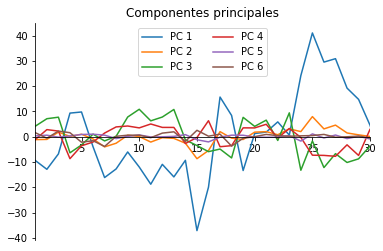

In [40]:
# Componentes principales.

fig, ax = plt.subplots()

PC.plot( title = "Componentes principales",
    ax = ax )

pc_name = [ "PC " + str(x) for x in
    range(1, PC.shape[1] + 1) ]

ax.set_xlabel(None)
ax.legend(pc_name, ncol = 2, loc = "upper center")

# Centra los ejes.
ax.spines["left"].set_position(("data", 1))
ax.spines["bottom"].set_position("zero")
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")

ax.set_xticks(ax.get_xticks()[1:])
ax.set_xticks(np.arange(5, 35, 5))
ax.set_xlim(1, 30)

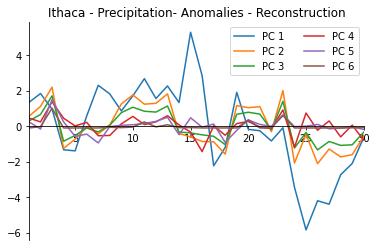

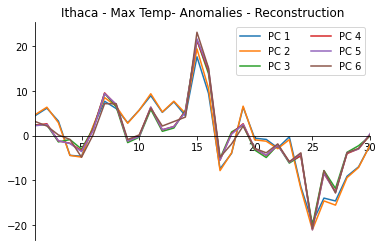

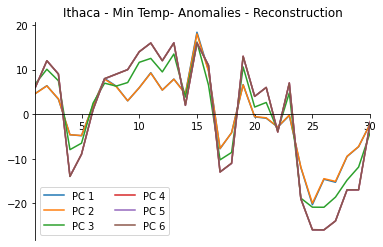

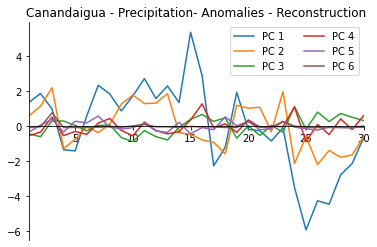

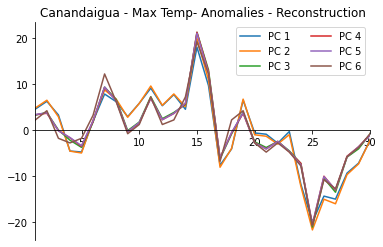

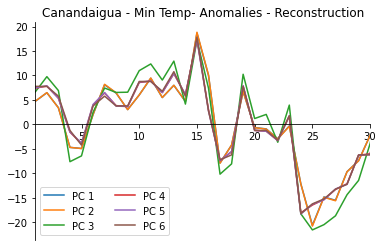

In [101]:
# Reconstrucción parcial.

i = 1

for i in range(len(var_a)):

    fig, ax = plt.subplots()

    for k in range(1, PC.shape[1] + 1):
        rec = PC.iloc[:, 0:k] @ v[:,0:k].T
        rec.iloc[:, i].plot(ax = ax)

    ax.set_title(var_a[i] + " - Reconstruction")
    ax.set_xlabel(None)
    ax.legend(pc_name, ncol = 2)

    # Centra los ejes.
    ax.spines["left"].set_position(("data", 1))
    ax.spines["bottom"].set_position("zero")
    ax.spines["right"].set_color("none")
    ax.spines["top"].set_color("none")
    ax.xaxis.set_ticks_position("bottom")
    ax.yaxis.set_ticks_position("left")

    ax.set_xticks(ax.get_xticks()[1:])
    ax.set_xticks(np.arange(5, 35, 5))
    ax.set_xlim(1, 30)